# Linear regression


In [1]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


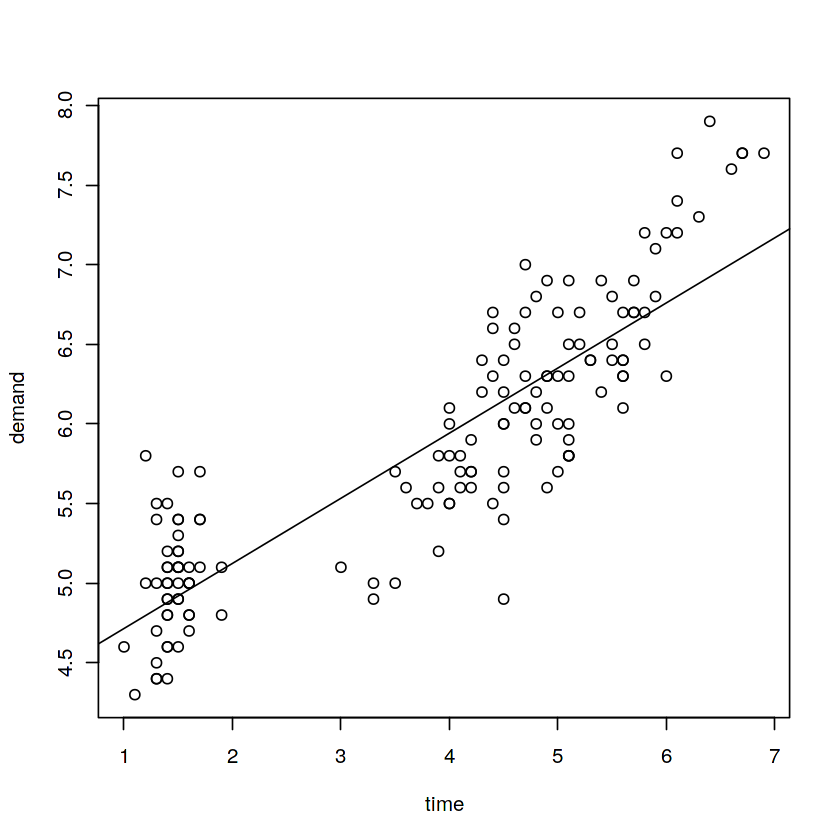

In [2]:
df<- iris
model <- lm(Sepal.Length~Petal.Length,data=df)

plot(df$Petal.Length,df$Sepal.Length,abline(model), xlab="time",ylab='demand')

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


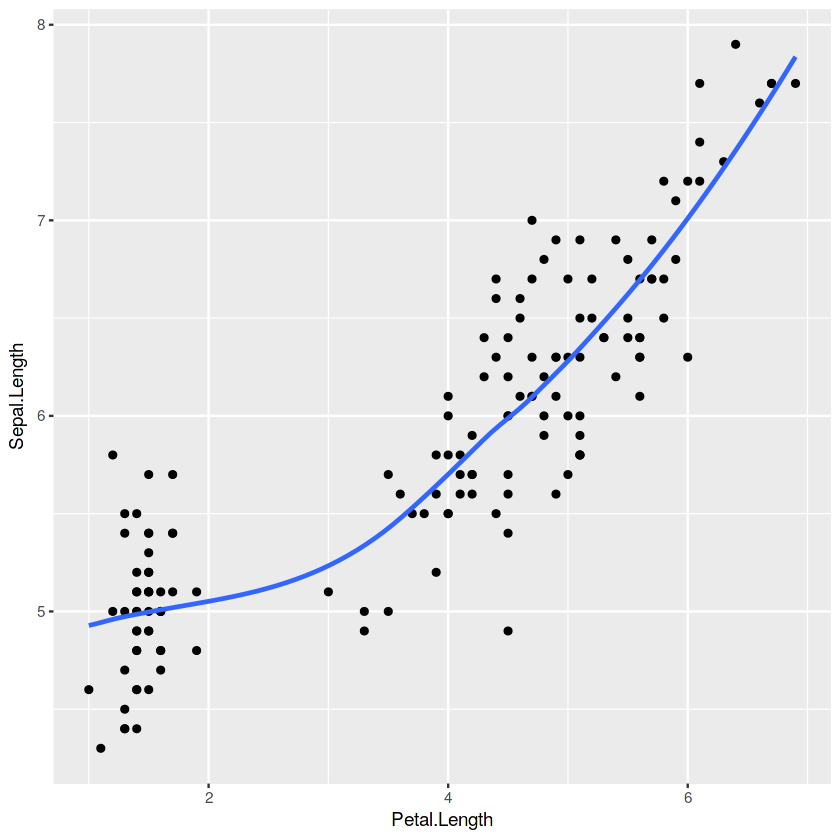

In [3]:
library(ggplot2)
ggplot(df, aes(x=Petal.Length, y= Sepal.Length))+ geom_point()+ geom_smooth(se=FALSE)

In [4]:
x_pred <- data.frame(x=5)
predict(model,x_pred)

ERROR: Error in eval(predvars, data, env): object 'Petal.Length' not found


# Logistic regression

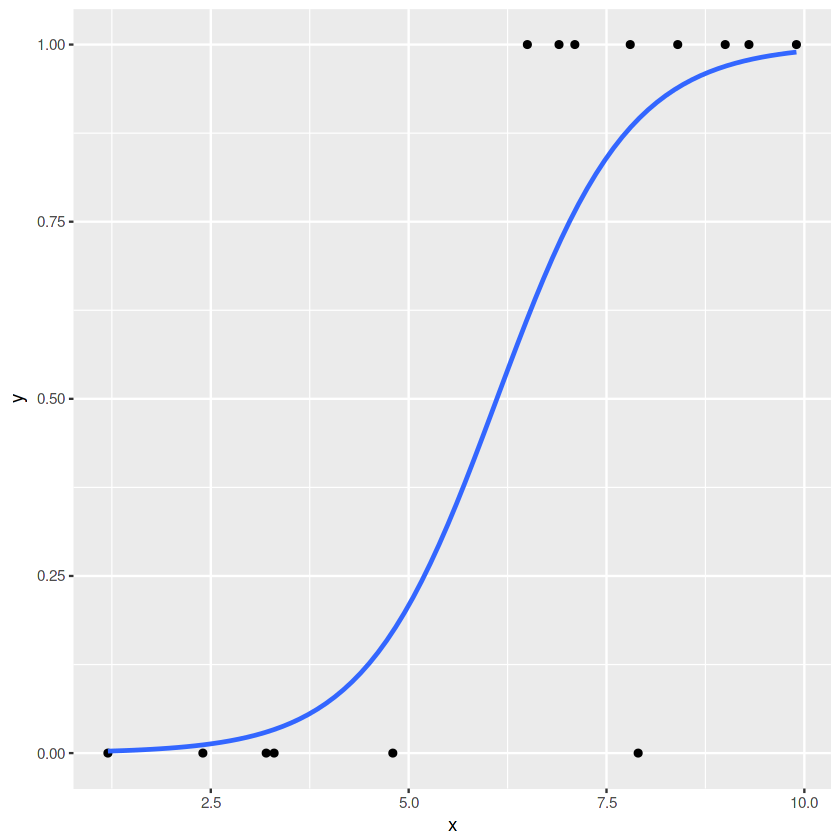

In [5]:
df = data.frame(x= c(1.2,3.2,3.3,4.8,2.4,7.9,7.1,8.4,9.3,9.0,7.8,6.5,6.9,9.9), y= c(0,0,0,0,0,0,1,1,1,1,1,1,1,1))
# model <- glm(y ~ x,data=df, family=binomial(link="logit"))
library(ggplot2)
ggplot(df, aes(x=x, y=y))+geom_point()+ stat_smooth(method='glm', method.args=list(family=binomial),se=FALSE)

# Random Forest

In [6]:
# install.packages("randomForest")
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [7]:
df<- iris
df$Species <- factor(df$Species, levels= c('setosa','virginica','versicolor'),labels=c(1,2,3))
output <- randomForest(Species ~ Sepal.Length + Sepal.Width +Petal.Length +
                       Petal.Width, data=df ,ntree=200)
print(output)


Call:
 randomForest(formula = Species ~ Sepal.Length + Sepal.Width +      Petal.Length + Petal.Width, data = df, ntree = 200) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.67%
Confusion matrix:
   1  2  3 class.error
1 50  0  0        0.00
2  0 46  4        0.08
3  0  3 47        0.06


In [8]:
x <- data.frame(Sepal.Length=c(1,2),Sepal.Width=c(3,4),Petal.Length=c(3,4),
                Petal.Width=c(3,4))
predict(output,x)

1 2 
2 2 
Levels: 1 2 3

# K-means clustering

In [9]:
# install.packages('ggplot2')
# install.packages()
library('ggplot2')
library('factoextra')

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [10]:
df <- subset(iris, select = c(1,4))
# df <- data.frame(x=c(2,2,3,4,5,6,7,5,4,3), y=c(7,8,9,8,7,5,2,3,1,2))

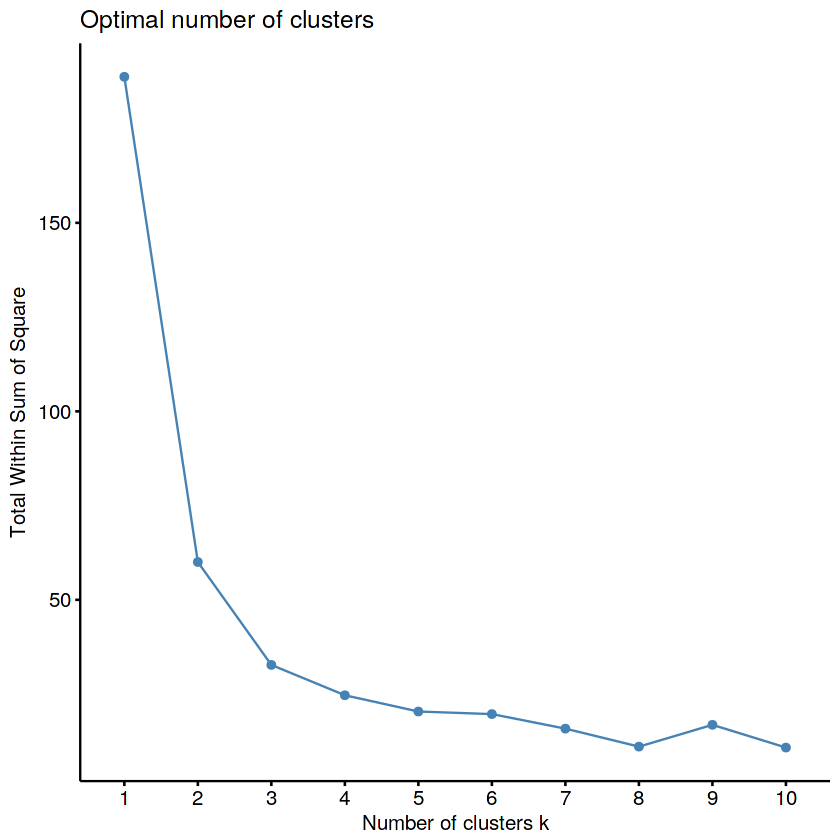

In [11]:
library(cluster)
fviz_nbclust(df,kmeans, method = 'wss')

# or

In [12]:
elbow_function <- function(data,nc,seed){
    set.seed(seed)
    wss <- c()
    for(i in 2:nc){
        km <- kmeans(data,centers=i)
        wss[i] <- km$tot.withinss   #total within sum of clusters
    }
    plot(1:nc, wss,type='b')
}

In [13]:
dim(df)

[1] 150   2

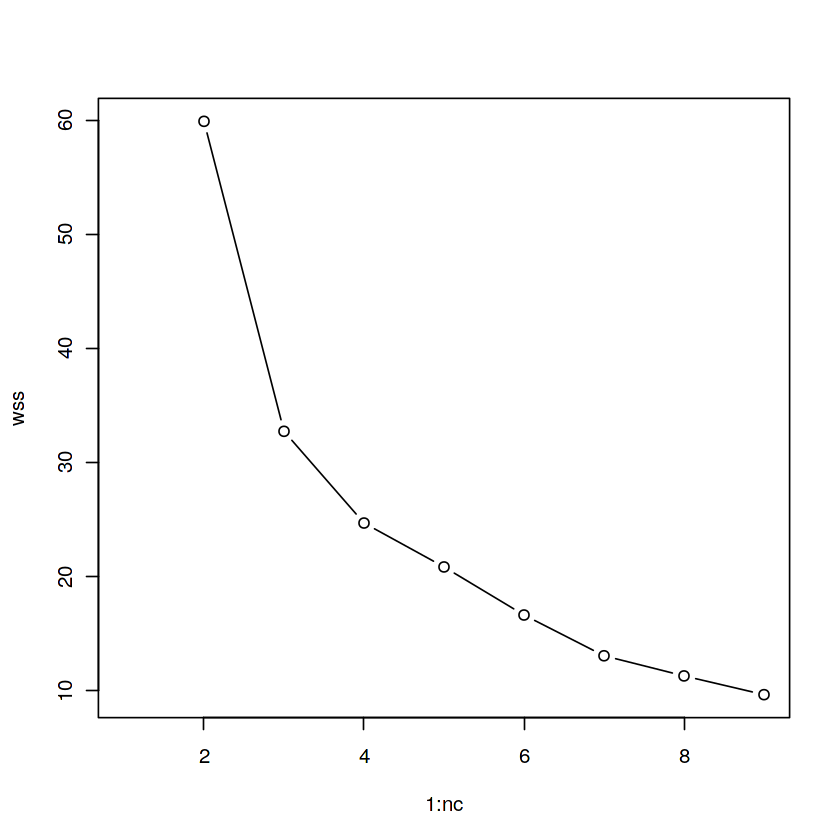

In [14]:
# nc should be 1 - number of rows in data
# seed is to make sure that we get the same results for randomization
elbow_function(df,9,100)

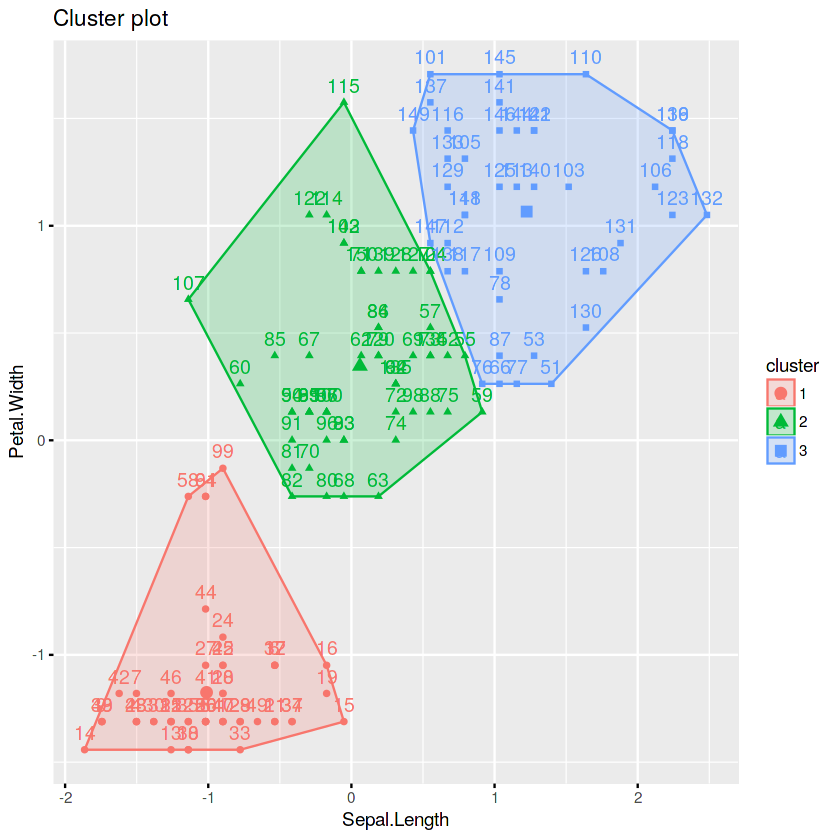

In [15]:
# from elbow curve we can infer that 3 is best k
km <- kmeans(df,centers=3)
fviz_cluster(km,data=df)

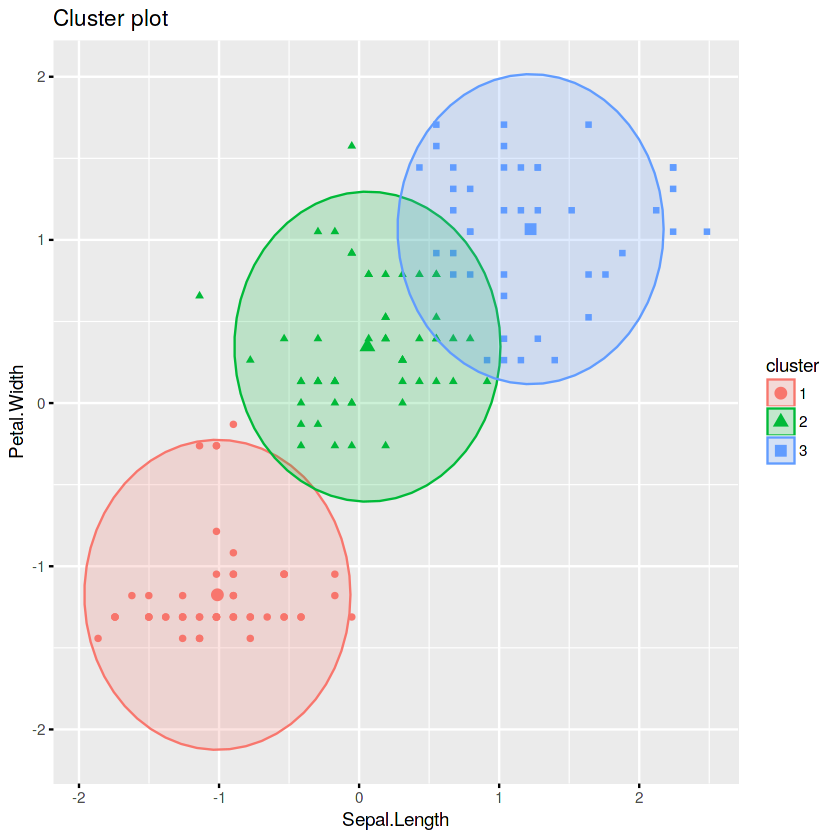

In [16]:
# for prettier visualisation
fviz_cluster(km,df,geom=c('point'),ellipse.type='euclid')

In [17]:
# to view final centers
km$centers
km$withinss
km$size

,Sepal.Length,Petal.Width
1,5.005556,0.3037037
2,5.892593,1.4629630
3,6.857143,2.0119048


[1]  8.907593 10.842963 12.986905

[1] 54 54 42

In [18]:
print(km)

K-means clustering with 3 clusters of sizes 54, 54, 42

Cluster means:
  Sepal.Length Petal.Width
1     5.005556   0.3037037
2     5.892593   1.4629630
3     6.857143   2.0119048

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   1   1   1   3   2   3   2   2   2   2   1   2   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   2   2   2   2   3   2   2   2   2   2   2   2   2   2   3   3   3   2   2 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  2   2   2   2   2   2   3   2   2   2   2   2   2   1   2   2   2   2 

# Association rule

In [19]:
library(arules)
library(arulesViz)

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write

Loading required package: grid


transactions in sparse format with
 8 transactions (rows) and
 6 items (columns)


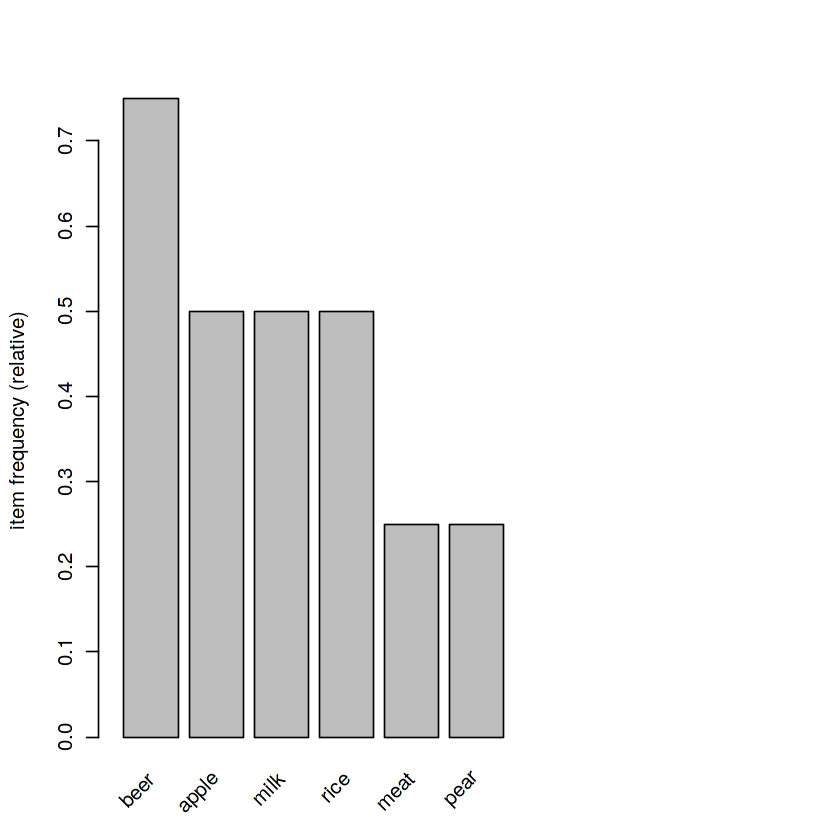

In [20]:
df <- list(  
  c("apple", "beer", "rice", "meat"),
  c("apple", "beer", "rice"),
  c("apple", "beer"), 
  c("apple", "pear"),
  c("milk", "beer", "rice", "meat"), 
  c("milk", "beer", "rice"), 
  c("milk", "beer"),
  c("milk", "pear")
  )
trans <- as(df,'transactions')
print(trans)
itemFrequencyPlot(trans,topN=10)

In [21]:
model <- apriori(trans, parameter = list(support=0.1,confidence=0.2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 8 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [57 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


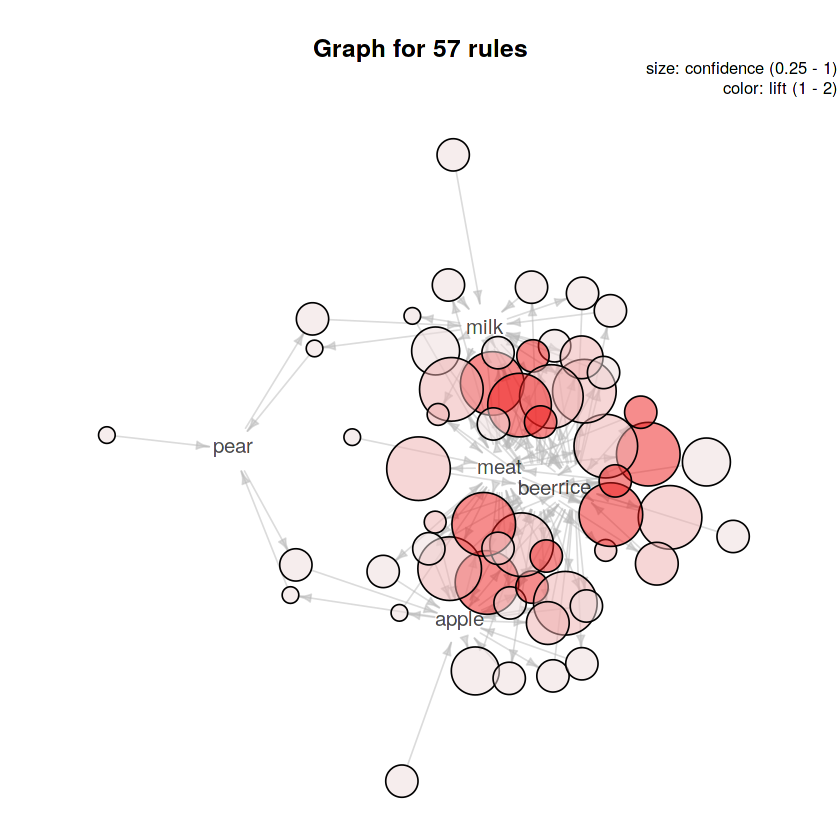

In [22]:
plot(model, method='graph', measure='confidence')